In [1]:
# # import numpy as np
# import librosa
# import librosa.display
# import os
# import csv
# %matplotlib inline
import matplotlib.pyplot as plt
# import random

import numpy as np
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
IPython.display.Audio("/home/isro/summer_proj/Conv_bot/LibriSpeech/train-clean-100/19/198/19-198-0001.flac")

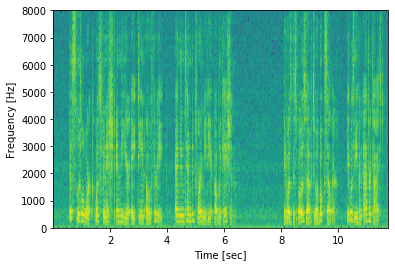

In [3]:
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt

def make_gram(flac_file):
  data, samplerate = sf.read(flac_file)
  freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
  # plt.pcolormesh(time, freq, Sxx)
  Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)
  # add axis labels
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')

make_gram("/home/isro/summer_proj/Conv_bot/LibriSpeech/train-clean-100/19/198/19-198-0001.flac")

In [4]:

data_directory = "/home/isro/summer_proj/Conv_bot/LibriSpeech"

labels = []
durations = []
keys = []
for group in os.listdir(data_directory):
    speaker_path = os.path.join(data_directory, group)
    if not os.path.isdir(speaker_path):
        continue
    for speaker in os.listdir(speaker_path):
        chapter_path = os.path.join(speaker_path, speaker)
        if not os.path.isdir(chapter_path):
            continue
        for chapter in os.listdir(chapter_path):
            labels_file = os.path.join(chapter_path, chapter,
                                        '{}-{}.trans.txt'
                                        .format(speaker, chapter))
#             print(labels_file)
            for line in open(labels_file):
                split = line.strip().split()
                file_id = split[0]
                label = ' '.join(split[1:]).lower()
                audio_file = os.path.join(chapter_path, chapter,
                                            file_id) + '.flac'
                # audio = wave.open(audio_file)
                # duration = float(audio.getnframes()) / audio.getframerate()
                # audio.close()
                # if float(duration) > max_duration:
                #     continue
                keys.append(audio_file)
                # durations.append(duration)
                labels.append(label)


In [5]:
print(labels[0])
print(keys[0])

while the settlers and their families were contentedly at work developing the resources of the country the astounding cry gold discovered came through the valley like a blight stopping every industry in its wake
/home/isro/summer_proj/Conv_bot/LibriSpeech/train-clean-100/2691/156750/2691-156750-0000.flac


In [6]:
IPython.display.Audio(keys[0])

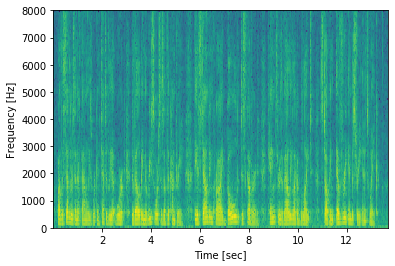

In [41]:
make_gram(keys[0])

In [8]:
import librosa
import librosa.display
def make_spec(file, flip = False, ps = False, st = 4):
    """
    create a melspectrogram from the amplitude of the sound
    
    Args:
        file (str): filename
        file_dir (str): directory path
        flip (bool): reverse time axis
        ps (bool): pitch shift
        st (int): half-note steps for pitch shift
    Returns:
        np.array with shape (122,85) (time, freq)
    """
    sig, rate = librosa.load(file, sr = 16000)
    if len(sig) < 16000: # pad shorter than 1 sec audio with ramp to zero
        sig = np.pad(sig, (0,16000-len(sig)), 'linear_ramp')
    if ps:
        sig = librosa.effects.pitch_shift(sig, rate, st)
    D = librosa.amplitude_to_db(librosa.stft(sig[:16000], n_fft = 512, 
                                             hop_length = 128, 
                                             center = False), ref = np.max)
    S = librosa.feature.melspectrogram(S=D, n_mels = 85).T
    if flip:
        S = np.flipud(S)
    return S.astype(np.float32)

/usr/local/lib/python3.6/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:1702: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


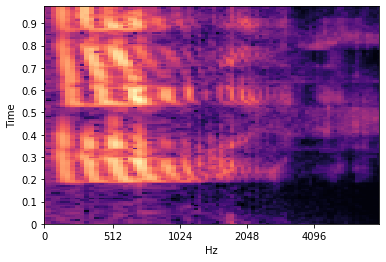

In [9]:
librosa.display.specshow(make_spec(keys[0]), 
                         x_axis='mel', 
                         fmax=8000, 
                         y_axis='time', 
                         sr = 16000,
                         hop_length = 128)

In [10]:
make_spec(keys[0]).shape

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:1702: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


(122, 85)

In [26]:
def create_sets(file_list = keys[:200]):
    X_array = np.zeros([len(file_list),122,85]) 
    return X_array

In [27]:
X_train= create_sets()

In [28]:
print(X_train[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
for ind, file in enumerate(keys[:200]):
    X_train[ind] = make_spec(file)


/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:1702: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [44]:
print(X_train[101])
print(np.shape(X_train))


[[-1.03910661 -1.24592745 -1.21355665 ... -1.85986376 -1.85401261
  -1.85632634]
 [-0.9799161  -1.03850102 -1.15035045 ... -1.85667133 -1.85401261
  -1.85357332]
 [-0.9402259  -1.20482576 -1.17417336 ... -1.85851288 -1.85180306
  -1.85750389]
 ...
 [-1.12399077 -1.1124562  -1.0468601  ... -1.59714007 -1.58644688
  -1.57913637]
 [-1.1729666  -1.14630842 -1.16428828 ... -1.66109335 -1.69846463
  -1.7146126 ]
 [-1.11654747 -1.10445583 -1.03073776 ... -1.68162394 -1.71716583
  -1.76604974]]
(200, 122, 85)


In [2]:
import tensorflow

/home/isro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/isro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/isro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/isro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

1.14.0
